In [0]:
import numpy as np
#from preprocessed_mnist import load_dataset
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

# we reserve the last 10000 training examples for validation
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

In [0]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

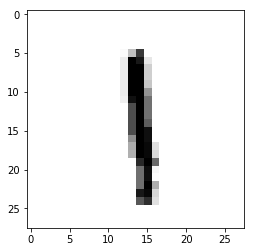

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[8],cmap=plt.cm.binary);

In [10]:
import tensorflow as tf
s = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [6]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))

model.add(ll.Flatten())

# network body
model.add(ll.Dense(200))
model.add(ll.Activation('sigmoid'))
#model.add(ll.Dropout(0.25))

model.add(ll.Dense(150))
model.add(ll.Activation('sigmoid'))
#model.add(ll.Dropout(0.25))

model.add(ll.Dense(50))
#model.add(ll.Activation('relu'))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=5);

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 172us/step - loss: 0.4099 - acc: 0.8798 - val_loss: 0.1965 - val_acc: 0.9419
Epoch 2/5
50000/50000 [==============================] - 8s 159us/step - loss: 0.1732 - acc: 0.9478 - val_loss: 0.1310 - val_acc: 0.9628
Epoch 3/5
50000/50000 [==============================] - 8s 156us/step - loss: 0.1161 - acc: 0.9647 - val_loss: 0.1356 - val_acc: 0.9589
Epoch 4/5
50000/50000 [==============================] - 8s 153us/step - loss: 0.0891 - acc: 0.9719 - val_loss: 0.0908 - val_acc: 0.9730
Epoch 5/5
50000/50000 [==============================] - 8s 158us/step - loss: 0.0670 - acc: 0.9788 - val_loss: 0.0931 - val_acc: 0.9717


### Check the accuracy on Test data 

In [0]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

10000/10000 [==============================] - 1s 57us/step

Loss, Accuracy =  [0.09248261755928397, 0.9701]


### Plotting the curves

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


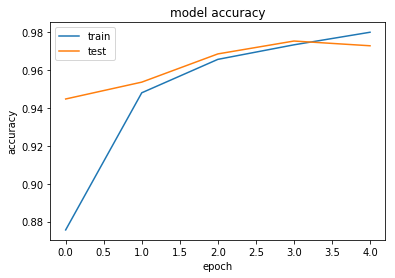

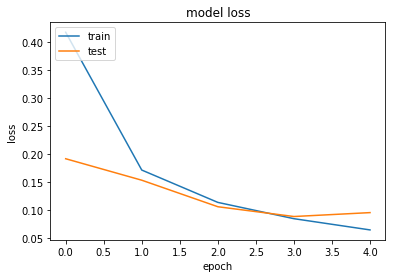

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()